In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
try:
    import torchbearer
except:
    !pip install -q torchbearer
    import torchbearer
    !pip install livelossplot
print(torchbearer.__version__)

0.5.3


In [3]:
import os
os.listdir('/content/drive/MyDrive/ANN-HW4/Flowers')

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [4]:
pic_selected = sorted(os.listdir("/content/drive/MyDrive/ANN-HW4/Flowers"))
pic_selected

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [5]:
data_dir="/content/drive/MyDrive/ANN-HW4/Flowers"

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img

rows = 1
cols = 5
counter=0
data=[]
label=[]
for pic_id in pic_selected:
  counter=pic_selected.index(pic_id)
  pic_selected_images = os.listdir(os.path.join(data_dir,pic_id))
  for id in pic_selected_images:
    img=cv2.imread(os.path.join(data_dir,pic_id, id),cv2.IMREAD_COLOR)
    img = cv2.resize(img, (128,128))
    data.append(np.array(img))
    label.append(counter)

    

In [7]:
dataset=np.array(data)
labels=np.array(label)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(dataset, labels, test_size=0.2, random_state=1)

In [9]:
X_train=X_train/256
X_eval=X_eval/256

In [10]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=5)
y_eval = to_categorical(y_eval, num_classes=5)

In [34]:
import keras
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/ANN-HW4/Model/Inception.h5")

In [ ]:
reconstructed_model.summary()

In [36]:
layer=reconstructed_model.get_layer('global_max_pooling2d_2').output

In [37]:
from keras.engine.training import Model
model=Model(inputs=reconstructed_model.input, outputs=layer)

In [38]:
model.trainable=False

In [39]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation, Input, BatchNormalization, Add, LeakyReLU, GlobalMaxPooling2D,concatenate
from keras.regularizers import l1_l2

x=Dense(128,activation="relu")(model.output)
x=Dropout(0.2)(x)
Output=Dense(5,activation="softmax")(x)

Umodel = Model(inputs=model.input, outputs=Output, name='ResNet')

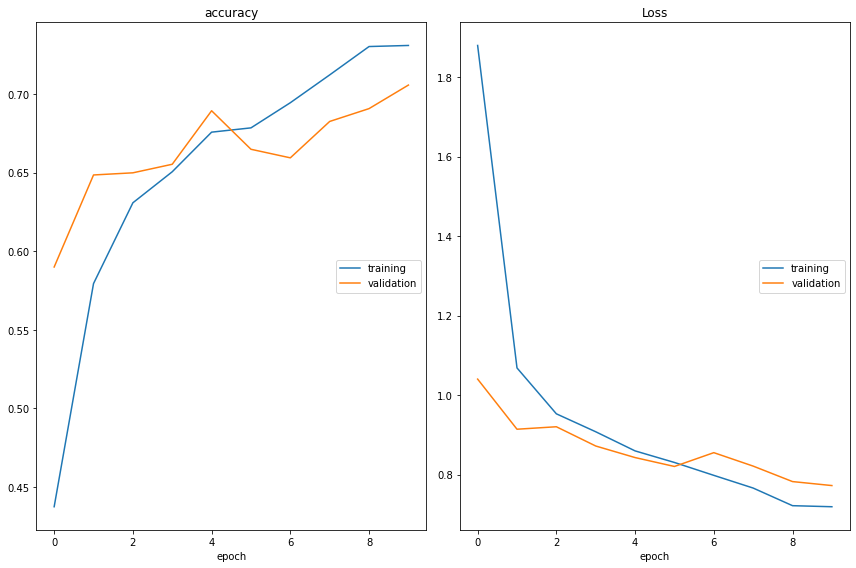

accuracy
	training         	 (min:    0.437, max:    0.731, cur:    0.731)
	validation       	 (min:    0.590, max:    0.706, cur:    0.706)
Loss
	training         	 (min:    0.719, max:    1.880, cur:    0.719)
	validation       	 (min:    0.772, max:    1.040, cur:    0.772)


In [40]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

n_epochs = 10

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

Umodel.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = Umodel.fit(X_train, y_train,batch_size=20,shuffle=True,
                    epochs=n_epochs, 
                    validation_data=(X_eval,y_eval),
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

In [46]:
layers=reconstructed_model.layers
for mlayer in layers[-12:-1]:
  mlayer.trainable=True

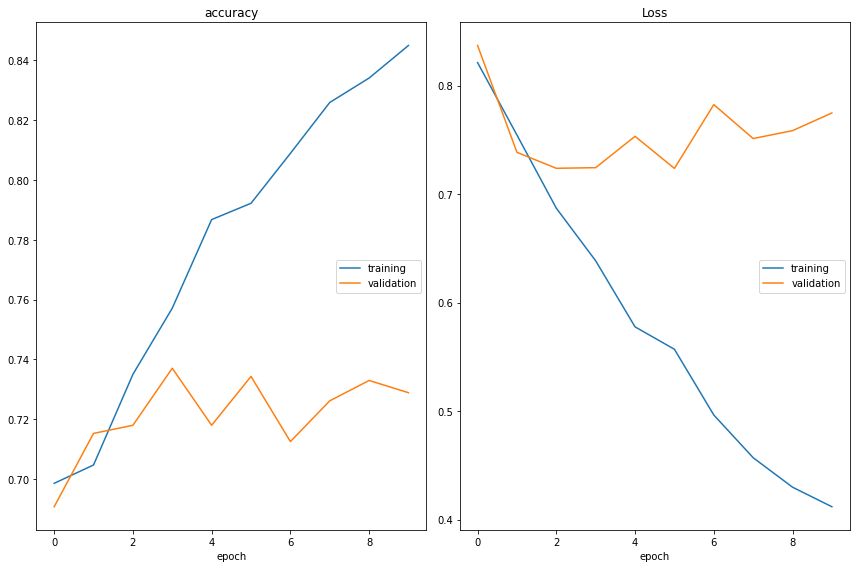

accuracy
	training         	 (min:    0.699, max:    0.845, cur:    0.845)
	validation       	 (min:    0.691, max:    0.737, cur:    0.729)
Loss
	training         	 (min:    0.412, max:    0.821, cur:    0.412)
	validation       	 (min:    0.724, max:    0.837, cur:    0.775)


In [48]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

n_epochs = 10

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

Umodel.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = Umodel.fit(X_train, y_train,batch_size=20,shuffle=True,
                    epochs=n_epochs, 
                    validation_data=(X_eval,y_eval),
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

In [49]:
layers=reconstructed_model.layers
for mlayer in layers[15:27]:
  mlayer.trainable=True

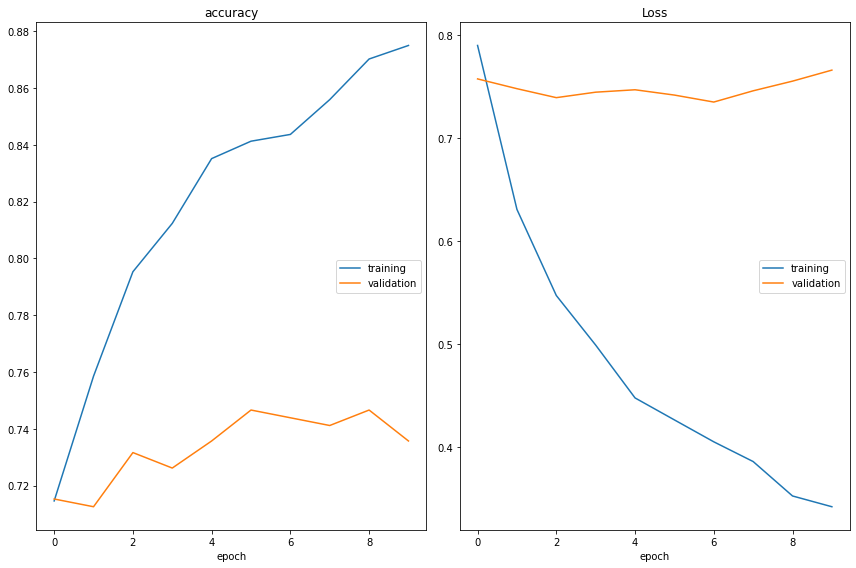

accuracy
	training         	 (min:    0.715, max:    0.875, cur:    0.875)
	validation       	 (min:    0.713, max:    0.747, cur:    0.736)
Loss
	training         	 (min:    0.342, max:    0.790, cur:    0.342)
	validation       	 (min:    0.735, max:    0.766, cur:    0.766)


In [50]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

n_epochs = 10

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

Umodel.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = Umodel.fit(X_train, y_train,batch_size=20,shuffle=True,
                    epochs=n_epochs, 
                    validation_data=(X_eval,y_eval),
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)

In [51]:
layers=reconstructed_model.layers
for mlayer in layers[1:15]:
  mlayer.trainable=True

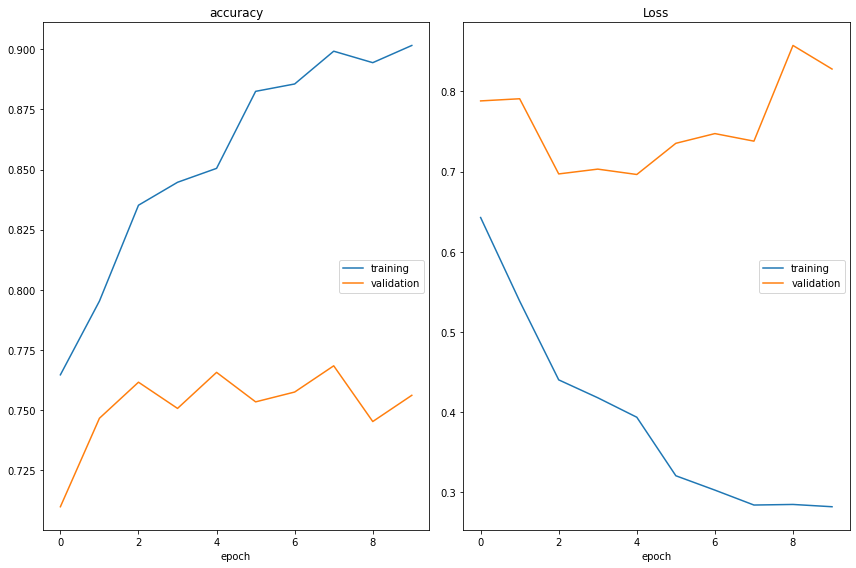

accuracy
	training         	 (min:    0.765, max:    0.902, cur:    0.902)
	validation       	 (min:    0.710, max:    0.768, cur:    0.756)
Loss
	training         	 (min:    0.282, max:    0.643, cur:    0.282)
	validation       	 (min:    0.696, max:    0.857, cur:    0.828)


In [53]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from livelossplot import PlotLossesKeras

n_epochs = 10

#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

Umodel.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = Umodel.fit(X_train, y_train,batch_size=20,shuffle=True,
                    epochs=n_epochs, 
                    validation_data=(X_eval,y_eval),
                    callbacks=[early_stop, checkpointer, PlotLossesKeras()],
                    verbose=False)